In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
dataFrame = pd.read_excel("verisetimiz.xlsx")

In [3]:
dataFrame.head()

,meslek,ay,yıl,toplam gelir,toplam gider
0,1,1,2020,12000,8000
1,1,2,2020,12000,5000
2,1,3,2020,12000,2000
3,1,4,2020,12000,10000
4,1,5,2020,12000,4777


<Figure size 504x360 with 0 Axes>

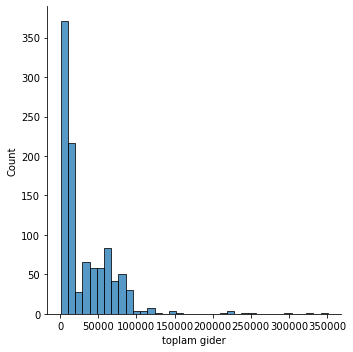

In [4]:
plt.figure(figsize = (7,5))
sbn.displot(dataFrame["toplam gider"])

/Users/begumuner/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ay', ylabel='count'>

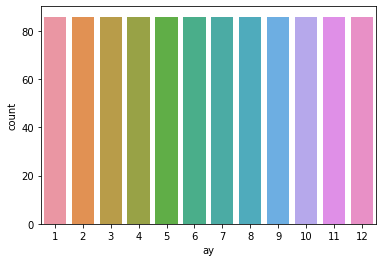

In [5]:
sbn.countplot(dataFrame["ay"])

In [6]:
dataFrame.corr()["toplam gider"].sort_values()

meslek         -0.100555
ay              0.003570
toplam gelir    0.924147
toplam gider    1.000000
yıl                  NaN
Name: toplam gider, dtype: float64

In [7]:
dataFrame.sort_values("toplam gider", ascending = False)

,meslek,ay,yıl,toplam gelir,toplam gider
344,3,9,2020,342300,350900
336,3,1,2020,342300,322900
340,3,5,2020,342300,295600
347,3,12,2020,342300,254300
346,3,11,2020,342300,245900
...,...,...,...,...,...
303,3,4,2020,2300,1000
315,3,4,2020,2300,1000
312,3,1,2020,2300,900
313,3,2,2020,2300,800


In [8]:
len(dataFrame)

1032

In [9]:
dataFrame.groupby("meslek").mean()["toplam gider"]

meslek
1     8634.316667
2    22327.416667
3    56534.423077
4     4982.433333
5    12191.632353
Name: toplam gider, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y = dataFrame["toplam gider"].values
x = dataFrame.drop("toplam gider", axis =1).values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [13]:
len(x_train)

722

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()

In [16]:
x_train = scaler.fit_transform(x_train)

In [17]:
x_test = scaler.transform(x_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:

model = Sequential()

model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [22]:
model.fit(x=x_train, y = y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)

Epoch 1/300
3/3 [==============================] - 0s 23ms/step - loss: 1275741184.0000 - val_loss: 863447296.0000
Epoch 2/300
3/3 [==============================] - 0s 10ms/step - loss: 1274141568.0000 - val_loss: 862384512.0000
Epoch 3/300
3/3 [==============================] - 0s 12ms/step - loss: 1272910976.0000 - val_loss: 861437504.0000
Epoch 4/300
3/3 [==============================] - 0s 10ms/step - loss: 1271436032.0000 - val_loss: 860468544.0000
Epoch 5/300
3/3 [==============================] - 0s 9ms/step - loss: 1269856640.0000 - val_loss: 859303488.0000
Epoch 6/300
3/3 [==============================] - 0s 10ms/step - loss: 1268530560.0000 - val_loss: 858276480.0000
Epoch 7/300
3/3 [==============================] - 0s 7ms/step - loss: 1267054720.0000 - val_loss: 857253568.0000
Epoch 8/300
3/3 [==============================] - 0s 11ms/step - loss: 1265504384.0000 - val_loss: 856128768.0000
Epoch 9/300
3/3 [==============================] - 0s 11ms/step - loss: 1264239232

3/3 [==============================] - 0s 7ms/step - loss: 1146605824.0000 - val_loss: 768400320.0000
Epoch 73/300
3/3 [==============================] - 0s 8ms/step - loss: 1144356736.0000 - val_loss: 766665408.0000
Epoch 74/300
3/3 [==============================] - 0s 7ms/step - loss: 1141912448.0000 - val_loss: 764908352.0000
Epoch 75/300
3/3 [==============================] - 0s 6ms/step - loss: 1139374976.0000 - val_loss: 763135936.0000
Epoch 76/300
3/3 [==============================] - 0s 7ms/step - loss: 1136841856.0000 - val_loss: 761213888.0000
Epoch 77/300
3/3 [==============================] - 0s 7ms/step - loss: 1134262656.0000 - val_loss: 759299200.0000
Epoch 78/300
3/3 [==============================] - 0s 7ms/step - loss: 1131802368.0000 - val_loss: 757453376.0000
Epoch 79/300
3/3 [==============================] - 0s 8ms/step - loss: 1129330176.0000 - val_loss: 755563840.0000
Epoch 80/300
3/3 [==============================] - 0s 6ms/step - loss: 1126569216.0000 - val

Epoch 143/300
3/3 [==============================] - 0s 8ms/step - loss: 896251008.0000 - val_loss: 583633536.0000
Epoch 144/300
3/3 [==============================] - 0s 8ms/step - loss: 891163264.0000 - val_loss: 580024576.0000
Epoch 145/300
3/3 [==============================] - 0s 8ms/step - loss: 886069056.0000 - val_loss: 576516672.0000
Epoch 146/300
3/3 [==============================] - 0s 7ms/step - loss: 881347904.0000 - val_loss: 572917888.0000
Epoch 147/300
3/3 [==============================] - 0s 8ms/step - loss: 876540352.0000 - val_loss: 569257216.0000
Epoch 148/300
3/3 [==============================] - 0s 8ms/step - loss: 871371648.0000 - val_loss: 565556992.0000
Epoch 149/300
3/3 [==============================] - 0s 9ms/step - loss: 865994944.0000 - val_loss: 561897408.0000
Epoch 150/300
3/3 [==============================] - 0s 7ms/step - loss: 861525824.0000 - val_loss: 558217536.0000
Epoch 151/300
3/3 [==============================] - 0s 9ms/step - loss: 8558485

Epoch 214/300
3/3 [==============================] - 0s 11ms/step - loss: 471258016.0000 - val_loss: 277262432.0000
Epoch 215/300
3/3 [==============================] - 0s 12ms/step - loss: 466116448.0000 - val_loss: 273205472.0000
Epoch 216/300
3/3 [==============================] - 0s 19ms/step - loss: 459708128.0000 - val_loss: 269239744.0000
Epoch 217/300
3/3 [==============================] - 0s 14ms/step - loss: 454436736.0000 - val_loss: 265344768.0000
Epoch 218/300
3/3 [==============================] - 0s 11ms/step - loss: 448467840.0000 - val_loss: 261507936.0000
Epoch 219/300
3/3 [==============================] - 0s 10ms/step - loss: 443320320.0000 - val_loss: 257735808.0000
Epoch 220/300
3/3 [==============================] - 0s 11ms/step - loss: 437539744.0000 - val_loss: 254070816.0000
Epoch 221/300
3/3 [==============================] - 0s 11ms/step - loss: 432086464.0000 - val_loss: 250490848.0000
Epoch 222/300
3/3 [==============================] - 0s 16ms/step - loss

Epoch 285/300
3/3 [==============================] - 0s 7ms/step - loss: 252984512.0000 - val_loss: 136362944.0000
Epoch 286/300
3/3 [==============================] - 0s 8ms/step - loss: 252228640.0000 - val_loss: 135768256.0000
Epoch 287/300
3/3 [==============================] - 0s 8ms/step - loss: 251027792.0000 - val_loss: 135239792.0000
Epoch 288/300
3/3 [==============================] - 0s 7ms/step - loss: 250303536.0000 - val_loss: 134695584.0000
Epoch 289/300
3/3 [==============================] - 0s 8ms/step - loss: 249382816.0000 - val_loss: 134180392.0000
Epoch 290/300
3/3 [==============================] - 0s 7ms/step - loss: 248626160.0000 - val_loss: 133685040.0000
Epoch 291/300
3/3 [==============================] - 0s 7ms/step - loss: 247759104.0000 - val_loss: 133205432.0000
Epoch 292/300
3/3 [==============================] - 0s 9ms/step - loss: 247203312.0000 - val_loss: 132741520.0000
Epoch 293/300
3/3 [==============================] - 0s 9ms/step - loss: 2464270

In [23]:
dataFrame.describe()

,meslek,ay,yıl,toplam gelir,toplam gider
count,1032.000000,1032.000000,1032.0,1032.000000,1032.000000
mean,3.162791,6.500000,2020.0,44333.720930,32227.231589
std,1.209665,3.453726,0.0,49018.214973,36629.212347
min,1.000000,1.000000,2020.0,2300.000000,737.000000
25%,3.000000,3.750000,2020.0,10000.000000,6453.000000
50%,3.000000,6.500000,2020.0,24000.000000,15000.000000
75%,4.000000,9.250000,2020.0,80000.000000,54340.000000
max,5.000000,12.000000,2020.0,342300.000000,350900.000000


In [24]:
tahminDizisi = model.predict(x_test)

In [25]:
tahminDizisi

array([[ 37046.82  ],
       [  8887.853 ],
       [ 81397.57  ],
       [ 20093.443 ],
       [ 54127.41  ],
       [ 10657.618 ],
       [ 20093.443 ],
       [ 12498.462 ],
       [ 14902.575 ],
       [ 17657.85  ],
       [ 29446.672 ],
       [ 14481.316 ],
       [ 59561.035 ],
       [ 70549.38  ],
       [ 18205.316 ],
       [ 23091.469 ],
       [ 11290.413 ],
       [ 65611.34  ],
       [ 45312.637 ],
       [ 18129.88  ],
       [ 70120.3   ],
       [ 15093.251 ],
       [ 25198.383 ],
       [ 95825.86  ],
       [  6213.4507],
       [ 63732.395 ],
       [ 54994.55  ],
       [ 30515.29  ],
       [  8270.816 ],
       [ 42557.363 ],
       [ 68363.97  ],
       [ 15297.687 ],
       [ 22199.184 ],
       [ 93680.4   ],
       [ 20413.121 ],
       [ 69262.1   ],
       [ 10788.248 ],
       [ 60106.09  ],
       [ 10708.098 ],
       [  9038.374 ],
       [ 10701.247 ],
       [  6863.6304],
       [ 52239.28  ],
       [ 11728.632 ],
       [ 63260.367 ],
       [ 6

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [27]:
mean_absolute_error(y_test,tahminDizisi)

8252.659359248992

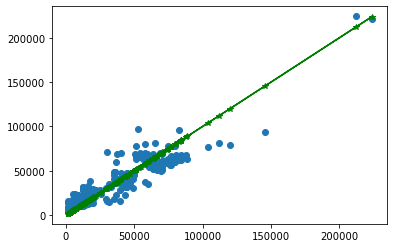

In [28]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [29]:
dataFrame.iloc[15]

meslek              1
ay                  4
yıl              2020
toplam gelir    20000
toplam gider    10000
Name: 15, dtype: int64

In [30]:
yeniOzellik = dataFrame.drop("toplam gider",axis=1).iloc[15]

In [31]:
type(yeniOzellik)

pandas.core.series.Series

In [32]:

yeniOzellik = scaler.transform(yeniOzellik.values.reshape(-1,4))

In [33]:
model.predict(yeniOzellik)

array([[22671.215]], dtype=float32)